In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Data Generation

x min:  [-8.99979057]
x max: [8.99864688]
y min:  [-0.6232363]
y max: [0.58639164]


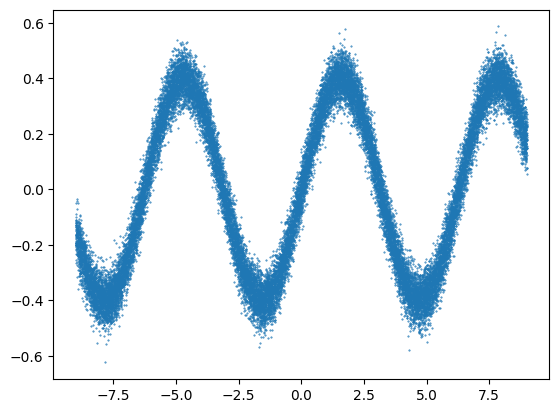

In [3]:
n_x_train = 30000   # the number of training datapoints
n_x_test = 8000     # the number of testing datapoints

x_train = np.random.rand(n_x_train,1)*18 - 9  # Initialize a vector of with dimensions [n_x, 1] and extend
y_train = (np.sin(x_train))/2.5           # Calculate the sin of all data points in the x vector and reduce amplitude
y_train += (np.random.randn(n_x_train, 1)/20)  # add noise to each datapoint

x_test = np.random.rand(n_x_test, 1)*18 - 9   # Repeat data generation for test set
y_test = (np.sin(x_test))/2.5
y_test += (np.random.randn(n_x_test, 1)/20)

print("x min: ", min(x_train))
print("x max:", max(x_train))
print("y min: ", min(y_train))
print("y max:", max(y_train))

fig0 = plt.figure()  # initialize a plot
plt.scatter(x_train, y_train, marker='o', s=0.2)  # plot x vs y
plt.show()  # open a window with the plot (you have to close it for the script to finish)

In [4]:
print(x_train.shape, y_train.shape)

(30000, 1) (30000, 1)


In [5]:
class SineNet(nn.Module):
    def __init__(self):
        super(SineNet, self).__init__()
        self.hidden = nn.Linear(1, 10)  # Hidden layer with 10 units
        self.h2 = nn.Linear(10, 10)
        self.h3 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 1)  # Output layer

    def forward(self, x):
        x = torch.relu(self.hidden(x))  # Activation function
        x_2 = torch.relu(self.h2(x))
        x_3 = torch.relu(self.h2(x_2))
        out = self.output(x_3)
        return out

model = SineNet()

In [6]:
criterion = nn.MSELoss()  # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam Optimizer

In [7]:
num_epochs = 50000

for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(torch.tensor(x_train, dtype=torch.float32))
    loss = criterion(outputs,torch.tensor(y_train, dtype=torch.float32))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [500/50000], Loss: 0.0065
Epoch [1000/50000], Loss: 0.0063
Epoch [1500/50000], Loss: 0.0063
Epoch [2000/50000], Loss: 0.0068
Epoch [2500/50000], Loss: 0.0062
Epoch [3000/50000], Loss: 0.0063
Epoch [3500/50000], Loss: 0.0063
Epoch [4000/50000], Loss: 0.0062
Epoch [4500/50000], Loss: 0.0064
Epoch [5000/50000], Loss: 0.0059
Epoch [5500/50000], Loss: 0.0032
Epoch [6000/50000], Loss: 0.0027
Epoch [6500/50000], Loss: 0.0026
Epoch [7000/50000], Loss: 0.0026
Epoch [7500/50000], Loss: 0.0028
Epoch [8000/50000], Loss: 0.0026
Epoch [8500/50000], Loss: 0.0025
Epoch [9000/50000], Loss: 0.0029
Epoch [9500/50000], Loss: 0.0026
Epoch [10000/50000], Loss: 0.0025
Epoch [10500/50000], Loss: 0.0025
Epoch [11000/50000], Loss: 0.0026
Epoch [11500/50000], Loss: 0.0025
Epoch [12000/50000], Loss: 0.0026
Epoch [12500/50000], Loss: 0.0025
Epoch [13000/50000], Loss: 0.0025
Epoch [13500/50000], Loss: 0.0025
Epoch [14000/50000], Loss: 0.0025
Epoch [14500/50000], Loss: 0.0026
Epoch [15000/50000], Loss: 0.0028


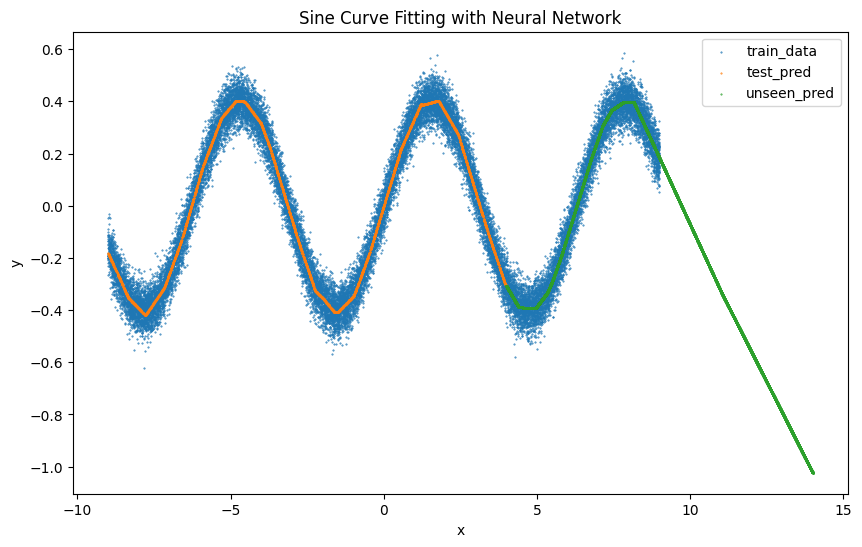

In [8]:
model.eval()
x_new = np.random.rand(n_x_train,1) * 10 + 4
with torch.no_grad():
    predicted = model(torch.tensor(x_test, dtype=torch.float32)).numpy()
    predicted_out = model(torch.tensor(x_new, dtype=torch.float32)).numpy()

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train,  marker='o', s=0.2, label='train_data')
plt.scatter(x_test, predicted,  marker='o', s=0.2, label='test_pred')
plt.scatter(x_new, predicted_out, marker='o', s=0.2, label='unseen_pred')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Sine Curve Fitting with Neural Network')
plt.show()